#### **Data Engineering Championship - Problem Statement:**

*Participants need to analyse and create features of the following description:*

    'DATE': create the date from year, month and day of the week 
    'LOW': Lower value of DEP_TIME_BLK
    'HIGH': Higher value of DEP_TIME_BLK
    'TIMESTAMP': create a timestamp with date and lower value of DEP_TIME_BLK
    'WIND_CHILL':  the perceived temperature due to cooling effect of wind blowing   
    'PRCP_SNOW_RATIO': ratio of precipitation and snow
    'PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO': ratio of plane age and airline and airport flights months.
    'SEAT_DISTRIBUTION': Ratio of seats and in  concurrent flight CONCURRENT_FLIGHTS
    'SEAT_DISTRIBUTION_NORMALISED': normalized values of ratio of seats and in  concurrent flight 

#### **1. Importing Necessary Libraries:**

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### **2. Loading the Data:**

In [2]:
main_df = pd.read_csv('participants_dataset_DES.csv')
submissions_df = pd.read_csv('submission_sample.csv')

    MONTH: Month
    DAY_OF_WEEK: Day of Week
    DEP_DEL15: TARGET Binary of a departure delay over 15 minutes (1 is yes)
    DISTANCE_GROUP: Distance group to be flown by departing aircraft
    DEP_BLOCK: Departure block
    SEGMENT_NUMBER: The segment that this tail number is on for the day
    CONCURRENT_FLIGHTS: Concurrent flights leaving from the airport in the same departure block
    NUMBER_OF_SEATS: Number of seats on the aircraft
    CARRIER_NAME: Carrier
    AIRPORT_FLIGHTS_MONTH: Avg Airport Flights per Month
    AIRLINE_FLIGHTS_MONTH: Avg Airline Flights per Month
    AIRLINE_AIRPORT_FLIGHTS_MONTH: Avg Flights per month for Airline AND Airport
    AVG_MONTHLY_PASS_AIRPORT: Avg Passengers for the departing airport for the month
    AVG_MONTHLY_PASS_AIRLINE: Avg Passengers for the airline for the month
    FLT_ATTENDANTS_PER_PASS: Flight attendants per passenger for airline
    GROUND_SERV_PER_PASS: Ground service employees (service desk) per passenger for airline
    PLANE_AGE: Age of departing aircraft
    DEPARTING_AIRPORT: Departing Airport
    LATITUDE: Latitude of departing airport
    LONGITUDE: Longitude of departing airport
    PREVIOUS_AIRPORT: Previous airport that aircraft departed from
    PRCP: Inches of precipitation for the day
    SNOW: Inches of snowfall for the day
    SNWD: Inches of snow on the ground for the day
    TMAX: Max temperature for the day
    AWND: Max wind speed for the day

In [3]:
main_df.head(5)

,AIRPLANE_ID,YEAR,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,608900,2020.0,1.0,4,0,0800-0859,NaN,3.0,22.0,NaN,Southwest Airlines Co.,4728.0,107363.0,NaN,2711399.0,13382999.0,0.000061,NaN,11.0,Minneapolis-St Paul International,33.291,-75.177,McCarran International,NaN,NaN,0.0,NaN,NaN
1,211610,2020.0,1.0,4,0,0600-0659,5.0,3.0,25.0,76.0,Southwest Airlines Co.,NaN,61899.0,189.0,1022110.0,3027151.0,0.000116,0.000099,2.0,Dallas Fort Worth Regional,34.163,-71.006,Orlando International,0.00,NaN,0.0,57.0,4.93
2,566705,NaN,1.0,4,0,1200-1259,3.0,NaN,19.0,174.0,United Air Lines Inc.,NaN,45432.0,94.0,1686287.0,2742196.0,0.000000,0.000099,11.0,Norfolk International,29.534,-81.622,Chicago Midway International,NaN,0.0,0.0,77.0,7.58
3,338088,2020.0,NaN,3,1,1000-1059,7.0,NaN,NaN,143.0,Southwest Airlines Co.,4150.0,NaN,684.0,165157.0,13382999.0,NaN,0.000099,6.0,Dallas Fort Worth Regional,38.836,-91.015,Syracuse Hancock International,0.00,0.0,1.2,39.0,6.98
4,216070,2020.0,1.0,3,1,2200-2259,NaN,NaN,28.0,49.0,Delta Air Lines Inc.,7565.0,23248.0,277.0,1485501.0,11680845.0,0.000098,0.000177,NaN,Newark Liberty International,36.090,-95.852,Los Angeles International,0.34,0.4,NaN,35.0,13.79


In [4]:
submissions_df.head(5)

,DATE,LOW,HIGH,TIMESTAMP,WIND_CHILL,PRCP_SNOW_RATIO,PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO,SEAT_DISTRIBUTION,SEAT_DISTRIBUTION_NORMALISED
0,07/01/20,2100,2159,07/01/20 21:00,0,0,0,0,0
1,07/01/20,2100,2159,07/01/20 21:00,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


#### **3. Data Preprocessing:**
    3.0. Checking the information of the data
    3.1. Checking for Missing Values
    3.2. Checking for Duplicates
    3.3. Checking for Outliers
    3.4. Checking for Imbalance
    3.5. Checking for Correlation
    3.6. Checking for Skewness
    3.7. Checking for Normality
    3.8. Checking for Multicollinearity
    3.9. Checking for Feature Importance
    3.10. Checking for Feature Selection

In [5]:
main_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AIRPLANE_ID                    200000 non-null  int64  
 1   YEAR                           160000 non-null  float64
 2   MONTH                          160000 non-null  float64
 3   DAY_OF_WEEK                    200000 non-null  int64  
 4   DEP_DEL15                      200000 non-null  int64  
 5   DEP_TIME_BLK                   200000 non-null  object 
 6   DISTANCE_GROUP                 160000 non-null  float64
 7   SEGMENT_NUMBER                 160000 non-null  float64
 8   CONCURRENT_FLIGHTS             160000 non-null  float64
 9   NUMBER_OF_SEATS                160000 non-null  float64
 10  CARRIER_NAME                   200000 non-null  object 
 11  AIRPORT_FLIGHTS_MONTH          160000 non-null  float64
 12  AIRLINE_FLIGHTS_MONTH         

In [6]:
# 3.1. Check for missing values
main_df.isna().sum()

AIRPLANE_ID                          0
YEAR                             40000
MONTH                            40000
DAY_OF_WEEK                          0
DEP_DEL15                            0
DEP_TIME_BLK                         0
DISTANCE_GROUP                   40000
SEGMENT_NUMBER                   40000
CONCURRENT_FLIGHTS               40000
NUMBER_OF_SEATS                  40000
CARRIER_NAME                         0
AIRPORT_FLIGHTS_MONTH            40000
AIRLINE_FLIGHTS_MONTH            40000
AIRLINE_AIRPORT_FLIGHTS_MONTH    40000
AVG_MONTHLY_PASS_AIRPORT         40000
AVG_MONTHLY_PASS_AIRLINE         40000
FLT_ATTENDANTS_PER_PASS          40000
GROUND_SERV_PER_PASS             40000
PLANE_AGE                        40000
DEPARTING_AIRPORT                    0
LATITUDE                             0
LONGITUDE                            0
PREVIOUS_AIRPORT                     0
PRCP                             40000
SNOW                             40000
SNWD                     

In [7]:
# 3.2. Check for duplicate values
main_df.duplicated().sum()
# No Duplicates in the dataset

0

In [9]:
# The given dataset is for the year 2020.
main_df['YEAR'].value_counts()

2020.0    160000
Name: YEAR, dtype: int64

In [10]:
main_df['MONTH'].value_counts()
# Given dataset contains data for the month of January only.

1.0    160000
Name: MONTH, dtype: int64

In [13]:
# filling the NaN values in the 'YEAR' column with the mode of the 'YEAR' column
main_df['YEAR'] = main_df['YEAR'].fillna(main_df['YEAR'].mode())
# filling the NaN values in the 'MONTH' column with the mode of the 'MONTH' column
main_df['MONTH'] = main_df['MONTH'].fillna(main_df['MONTH'].mode())

In [14]:
# Changing the data type of the 'YEAR' column to 'int64'
main_df['YEAR'] = main_df['YEAR'].astype(int)
# Changing the data type of the 'MONTH' column to 'int64'
main_df['MONTH'] = main_df['MONTH'].astype(int)

In [16]:
# 'DATE': create the date from year, month and day of the week 
main_df['DATE'] = main_df[['YEAR', 'MONTH', 'DAY_OF_WEEK']].apply(lambda x: '-'.join(x.astype(str)), axis=1)

In [17]:
main_df['DATE'].head(10)

0    2020-1-4
1    2020-1-4
2    2020-1-4
3    2020-1-3
4    2020-1-3
5    2020-1-2
6    2020-1-4
7    2020-1-3
8    2020-1-2
9    2020-1-6
Name: DATE, dtype: object

In [18]:
# 'LOW': Lower value of DEP_TIME_BLK
# 'HIGH': Higher value of DEP_TIME_BLK
main_df['LOW'] = main_df['DEP_TIME_BLK'].str.split('-').str[0]
main_df['HIGH'] = main_df['DEP_TIME_BLK'].str.split('-').str[1]

In [21]:
# 'TIMESTAMP': create a timestamp with date and lower value of DEP_TIME_BLK
main_df['RAW_LOW_TIME'] = main_df['LOW'].apply(lambda x: x[:2] + ':' + x[2:])
main_df['TIMESTAMP'] = main_df[['DATE', 'RAW_LOW_TIME']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [24]:
main_df['TIMESTAMP'] = pd.to_datetime(main_df['TIMESTAMP'], format='%Y-%m-%d %H:%M')
main_df['TIMESTAMP'].head(10)

0   2020-01-04 08:00:00
1   2020-01-04 06:00:00
2   2020-01-04 12:00:00
3   2020-01-03 10:00:00
4   2020-01-03 22:00:00
5   2020-01-02 08:00:00
6   2020-01-04 08:00:00
7   2020-01-03 18:00:00
8   2020-01-02 07:00:00
9   2020-01-06 09:00:00
Name: TIMESTAMP, dtype: datetime64[ns]

In [37]:
main_df.drop(['RAW_LOW_TIME'], axis=1, inplace=True)

In [38]:
main_df.isna().sum()

AIRPLANE_ID                          0
YEAR                                 0
MONTH                                0
DAY_OF_WEEK                          0
DEP_DEL15                            0
DEP_TIME_BLK                         0
DISTANCE_GROUP                   40000
SEGMENT_NUMBER                   40000
CONCURRENT_FLIGHTS               40000
NUMBER_OF_SEATS                  40000
CARRIER_NAME                         0
AIRPORT_FLIGHTS_MONTH            40000
AIRLINE_FLIGHTS_MONTH            40000
AIRLINE_AIRPORT_FLIGHTS_MONTH    40000
AVG_MONTHLY_PASS_AIRPORT         40000
AVG_MONTHLY_PASS_AIRLINE         40000
FLT_ATTENDANTS_PER_PASS          40000
GROUND_SERV_PER_PASS             40000
PLANE_AGE                        40000
DEPARTING_AIRPORT                    0
LATITUDE                             0
LONGITUDE                            0
PREVIOUS_AIRPORT                     0
PRCP                             40000
SNOW                             40000
SNWD                     

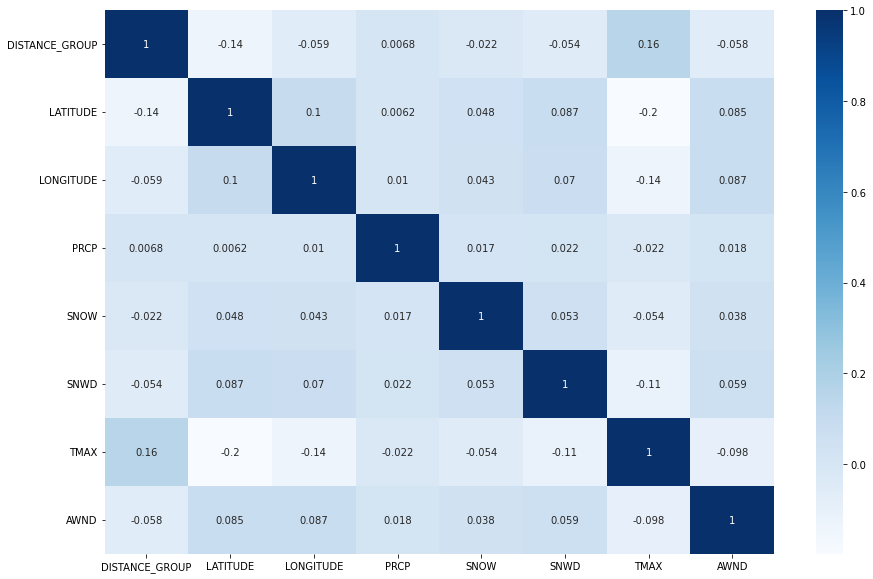

In [52]:
# Create a correlation heatmap  to check the correlation between the columns that can have an effect on the missing values in the 'TMAX' and 'AWND' columns
plt.figure(figsize=(15, 10))
sns.heatmap(main_df[['DEP_TIME_BLK', 'DISTANCE_GROUP', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']].corr(), annot=True, cmap='Blues')
plt.show()

In [46]:
main_df.columns

Index(['AIRPLANE_ID', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'DEP_DEL15',
       'DEP_TIME_BLK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER',
       'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME',
       'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'DATE', 'LOW', 'HIGH', 'TIMESTAMP'],
      dtype='object')

In [53]:
# We can take MICE Imputation to fill the missing values in all the columns:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create a copy of the main_df
main_df_copy = main_df.copy()

# Create a list of columns to be imputed
cols = ['AWND', 'TMAX']

# Create an instance of IterativeImputer
imputer = IterativeImputer()

# Impute the missing values in the 'AWND' and 'TMAX' columns
main_df_copy[cols] = imputer.fit_transform(main_df_copy[cols])

# Check for missing values in the 'AWND' and 'TMAX' columns
main_df_copy[cols].isna().sum()

AWND    0
TMAX    0
dtype: int64

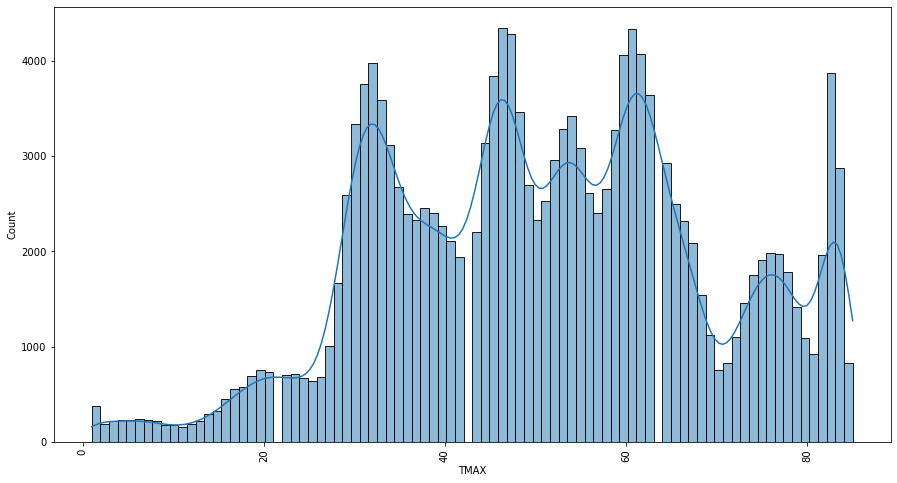

In [32]:
# Let's have a look at the distribution of the 'TMAX' and 'AWND' Columns before we fill the missing values
# Plot the distribution of the 'TMAX' column
plt.figure(figsize=(15, 8))
sns.histplot(x=main_df['TMAX'], kde=True)
plt.xticks(rotation=90)
plt.show()

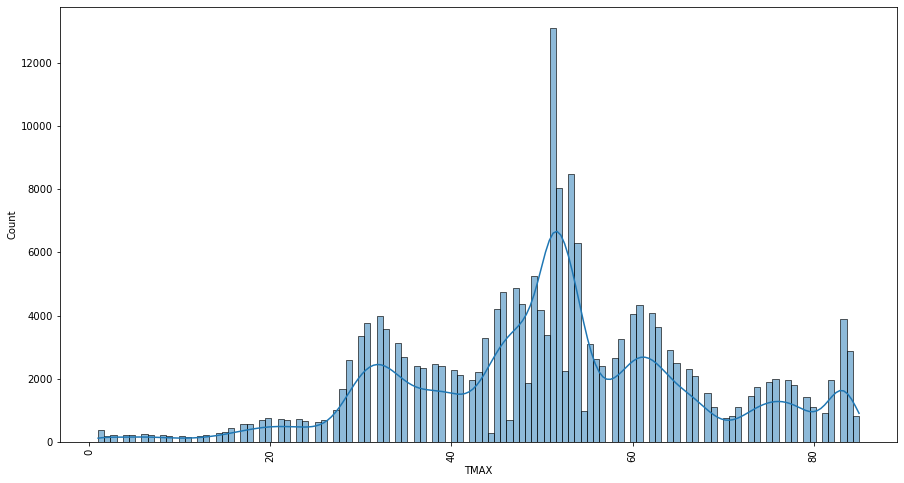

In [54]:
# Let's have a look at the distribution of the 'TMAX' and 'AWND' Columns after we fill the missing values
# Plot the distribution of the 'TMAX' column
plt.figure(figsize=(15, 8))
sns.histplot(x=main_df_copy['TMAX'], kde=True)
plt.xticks(rotation=90)
plt.show()

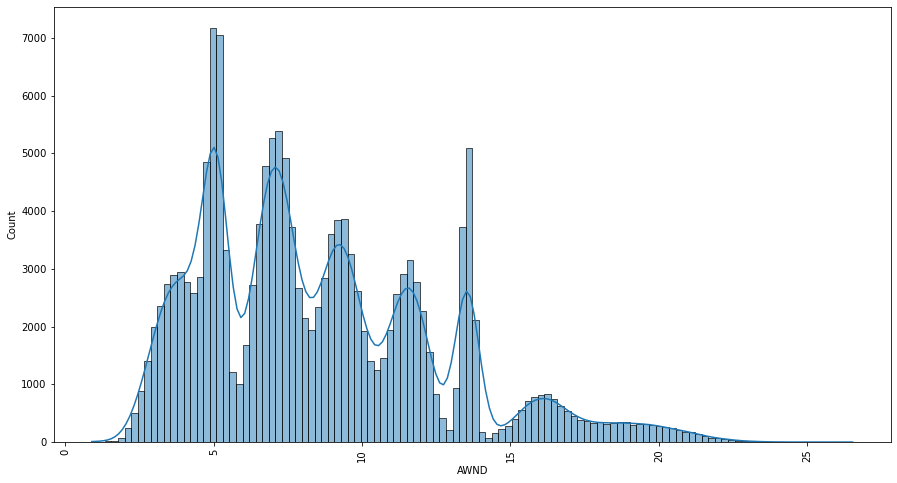

In [33]:
# Plot the distribution of the 'AWND' column before the Imputation
plt.figure(figsize=(15, 8))
sns.histplot(x=main_df['AWND'], kde=True)
plt.xticks(rotation=90)
plt.show()

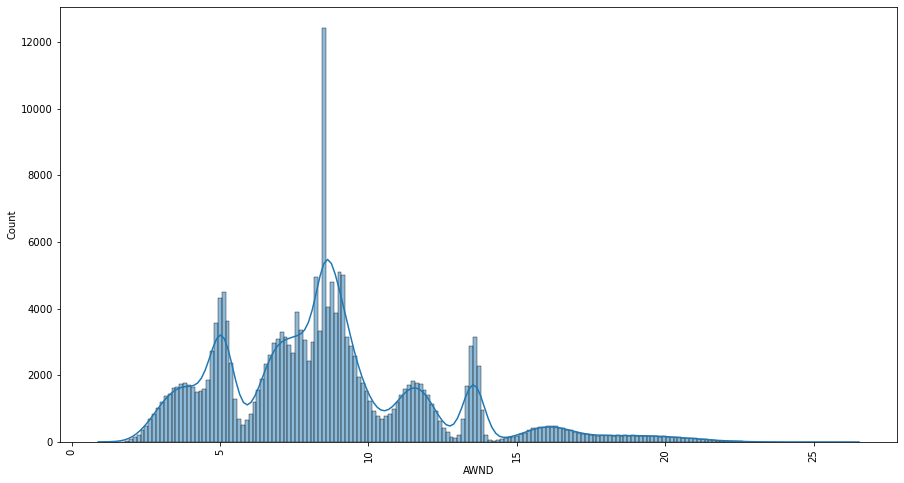

In [55]:
# Plot the distribution of the 'AWND' column after the Imputation
plt.figure(figsize=(15, 8))
sns.histplot(x=main_df_copy['AWND'], kde=True)
plt.xticks(rotation=90)
plt.show()

In [35]:
# Drop the "WIND_CHILL" column for the time being
# main_df.drop(['WIND_CHILL'], axis=1, inplace=True)

In [25]:
# 'WIND_CHILL':  the perceived temperature due to cooling effect of wind blowing   
# Wind Chill Temperature using the wind speed and temperature (Source: https://en.wikipedia.org/wiki/Wind_chill#/media/File:Wind_chill.png)

# TMAX: Max temperature for the day
# AWND: Max wind speed for the day

# Mising vlaues in the 'TMAX' and 'AWND' columns needs to be treated prior to calculating the 'WIND_CHILL' column

main_df['WIND_CHILL'] = 35.74 + (0.6215 * main_df['TMAX']) - (35.75 * (main_df['AWND'] ** 0.16)) + (0.4275 * main_df['TMAX'] * (main_df['AWND'] ** 0.16))

In [ ]:
# 'PRCP_SNOW_RATIO': ratio of precipitation and snow

In [ ]:
# 'PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO': ratio of plane age and airline and airport flights months.

In [ ]:
# 'SEAT_DISTRIBUTION': Ratio of seats and in  concurrent flight CONCURRENT_FLIGHTS

In [ ]:
# 'SEAT_DISTRIBUTION_NORMALISED': normalized values of ratio of seats and in  concurrent flight 